In [222]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, io
from skimage.filters import threshold_otsu, sobel
from skimage.color import rgb2gray
from skimage.transform import rotate

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage.morphology import binary_dilation

import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import mode
import math

In [ ]:
def objective_function_projection(img):
    projection = np.sum(img, axis=1)
    diffs = np.diff(projection)
    return np.square(diffs).sum()

def find_rotation_angle_projection(input_image_file):
    img = io.imread(input_image_file)
    img = rgb2gray(img)
    thresh = threshold_otsu(img)
    img = img > thresh #binarize

    plt.imshow(img, cmap='gray')
    plt.show()

    angles = np.arange(-90.0, 90.0, 1.0)
    costs = np.empty((len(angles), 2))
    i = 0
    for angle in angles:
        rotated_img = rotate(img, angle, cval=1)
        costs[i][0] = angle
        costs[i][1] = objective_function_projection(rotated_img)
        i += 1

    print("file:", input_image_file)
    
    #TODO: I think there is an error here. we should be considering only the 2nd column in costs for argmax.
    print("max objective function: ", costs[costs.argmax(axis=0)[1]])
    plt.plot(costs[:, 0], costs[:, 1])
    plt.show()
    plt.clf()
    
    return costs[costs.argmax(axis=0)[1]]

file: neg_28.png
line peaks
hspace [532 531 524 510 505 502 500 490 358 344 341 329 310 296 278 276]
angles [ 1.07937401  1.07937401  1.07937401  1.07937401  1.07937401  1.07937401
  1.07937401  1.07937401  0.76345967  0.78101046  1.30753437  1.44794075
  1.50059314  1.50059314  1.53569473  1.57079633]


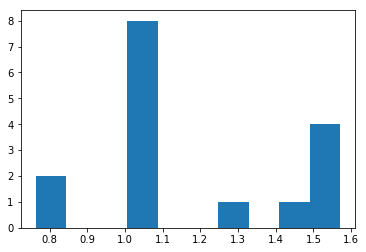

[ 0.76345967  0.78101046  1.07937401  1.30753437  1.44794075  1.50059314
  1.53569473  1.57079633] [1 1 8 1 1 2 1 1]
top in degrees: -28.156424581
angle_rotation:  -28.156424581
[ 1.07937401  1.07937401  1.07937401  1.07937401  1.07937401  1.07937401
  1.07937401  1.07937401  0.76345967  0.78101046  1.30753437  1.44794075
  1.50059314  1.50059314  1.53569473  1.57079633]


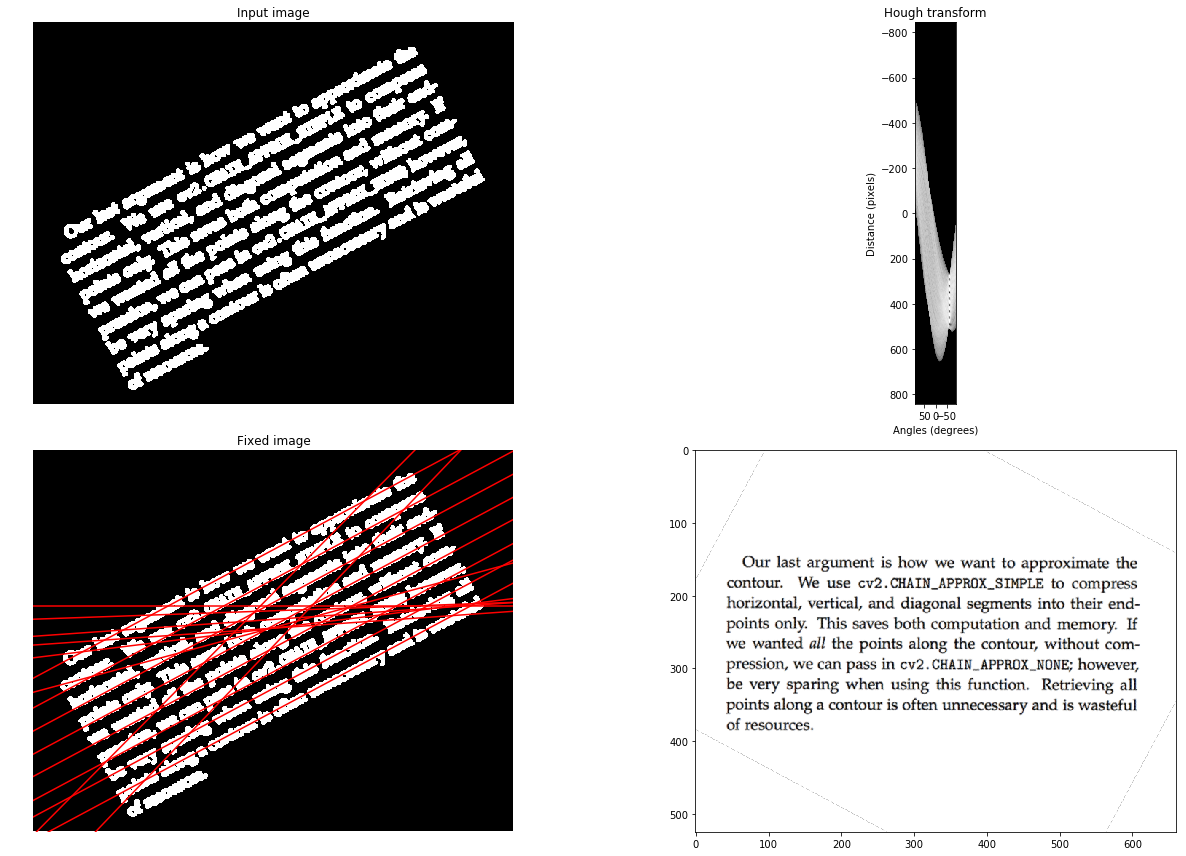

file: neg_4.png
line peaks
hspace [533 528 521 512 508 498 497 486 354 352 346 341 339 331 327 324 322 321
 320 311 271]
angles [ 1.50059314  1.50059314  1.50059314  1.50059314  1.50059314  1.50059314
  1.50059314  1.50059314 -1.46549155  1.18467879 -1.44794075 -1.57079633
 -1.43038995  1.20222959  1.23733118 -1.30753437  1.1320264   1.34263597
  1.32508517 -1.21978039 -1.1495772 ]


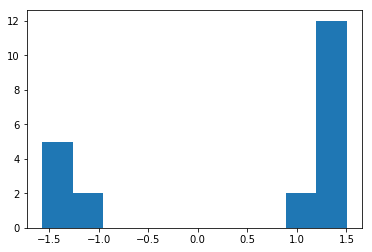

[-1.57079633 -1.46549155 -1.44794075 -1.43038995 -1.30753437 -1.21978039
 -1.1495772   1.1320264   1.18467879  1.20222959  1.23733118  1.32508517
  1.34263597  1.50059314] [1 1 1 1 1 1 1 1 1 1 1 1 1 8]
top in degrees: -4.02234636872
angle_rotation:  -4.02234636872
[ 1.50059314  1.50059314  1.50059314  1.50059314  1.50059314  1.50059314
  1.50059314  1.50059314 -1.46549155  1.18467879 -1.44794075 -1.57079633
 -1.43038995  1.20222959  1.23733118 -1.30753437  1.1320264   1.34263597
  1.32508517 -1.21978039 -1.1495772 ]


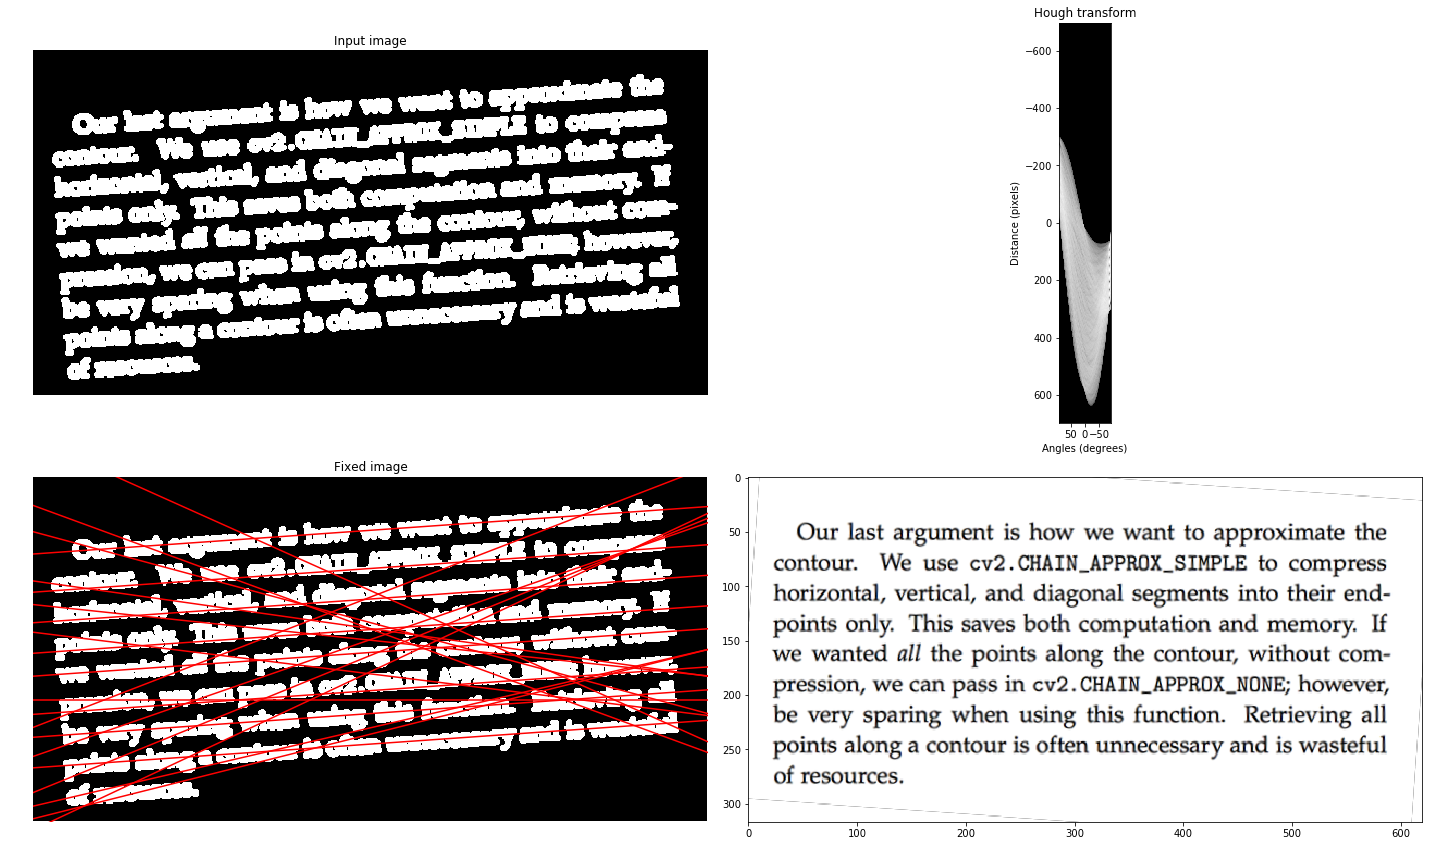

file: pos_24.png
line peaks
hspace [533 531 522 515 503 501 498 487 352 345 340 336 335 334 334 333 332 321
 315 290 277]
angles [-1.1495772  -1.1495772  -1.167128   -1.1495772  -1.1495772  -1.1495772
 -1.1495772  -1.1495772  -1.46549155 -0.93896764 -0.90386604 -0.83366286
 -1.32508517 -1.44794075 -1.55324553 -0.81611206 -1.41283915 -0.78101046
  1.57079633 -0.71080728 -0.65815489]


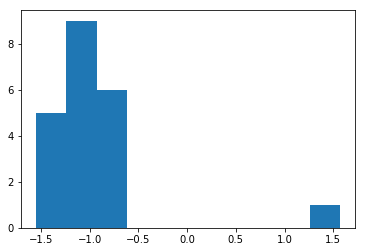

[-1.55324553 -1.46549155 -1.44794075 -1.41283915 -1.32508517 -1.167128
 -1.1495772  -0.93896764 -0.90386604 -0.83366286 -0.81611206 -0.78101046
 -0.71080728 -0.65815489  1.57079633] [1 1 1 1 1 1 7 1 1 1 1 1 1 1 1]
top in degrees: 24.1340782123
angle_rotation:  24.1340782123
[-1.1495772  -1.1495772  -1.167128   -1.1495772  -1.1495772  -1.1495772
 -1.1495772  -1.1495772  -1.46549155 -0.93896764 -0.90386604 -0.83366286
 -1.32508517 -1.44794075 -1.55324553 -0.81611206 -1.41283915 -0.78101046
  1.57079633 -0.71080728 -0.65815489]


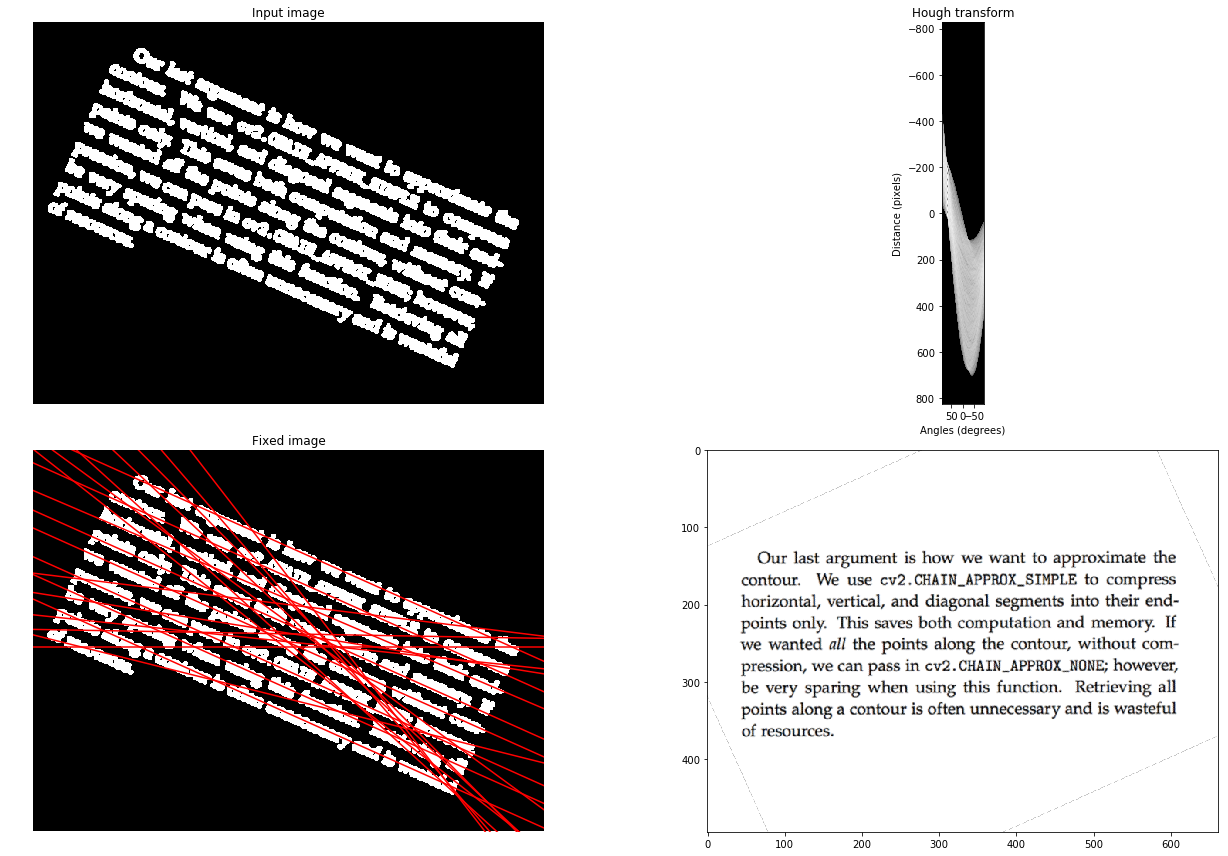

file: pos_41.png
line peaks
hspace [533 531 523 518 515 503 492 486 365 365 359 337 332 331 328 307 298 294
 277 270]
angles [-0.85121365 -0.85121365 -0.86876445 -0.85121365 -0.85121365 -0.85121365
 -0.85121365 -0.85121365 -0.5879517  -1.167128   -0.5879517  -0.5879517
 -1.11447561 -1.1495772  -0.51774851 -0.42999453 -0.42999453 -0.41244373
 -0.35979134 -0.34224054]


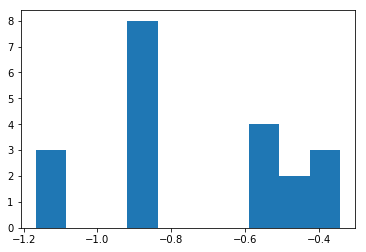

[-1.167128   -1.1495772  -1.11447561 -0.86876445 -0.85121365 -0.5879517
 -0.51774851 -0.42999453 -0.41244373 -0.35979134 -0.34224054] [1 1 1 1 7 3 1 2 1 1 1]
top in degrees: 41.2290502793
angle_rotation:  41.2290502793
[-0.85121365 -0.85121365 -0.86876445 -0.85121365 -0.85121365 -0.85121365
 -0.85121365 -0.85121365 -0.5879517  -1.167128   -0.5879517  -0.5879517
 -1.11447561 -1.1495772  -0.51774851 -0.42999453 -0.42999453 -0.41244373
 -0.35979134 -0.34224054]


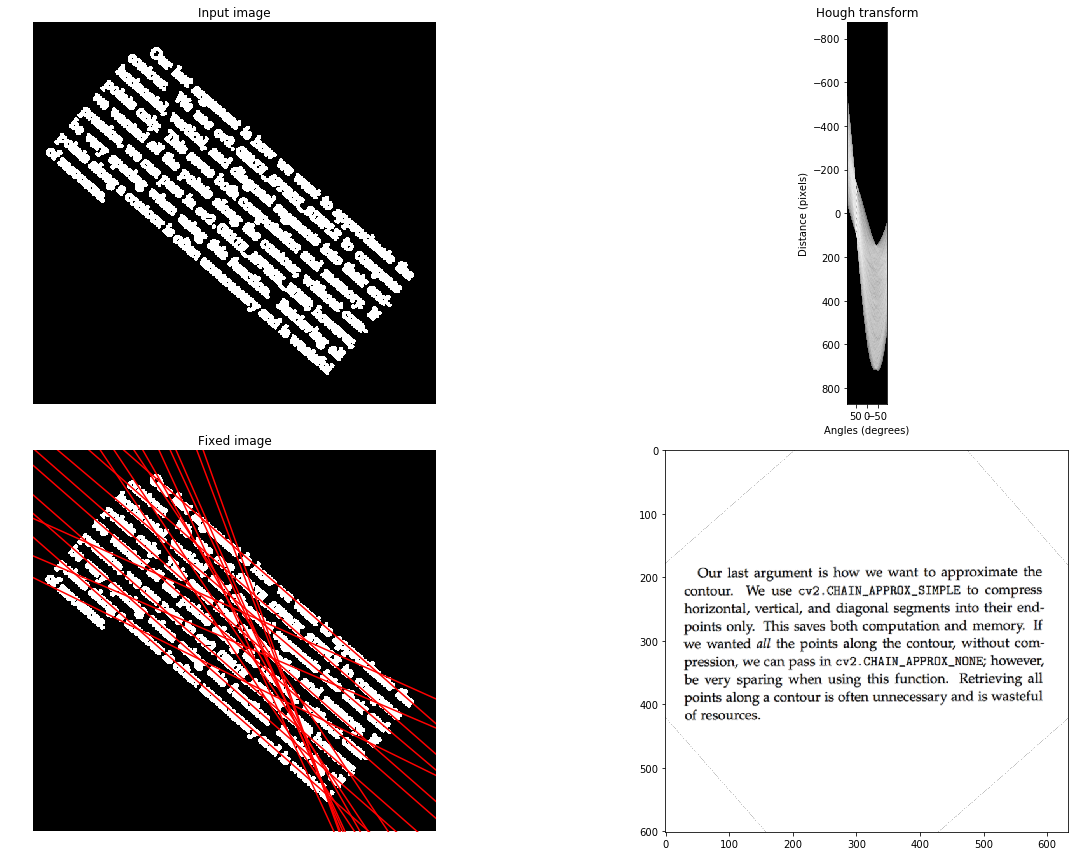

file: sample1.png
line peaks
hspace [266 260 230 228 225 215 211 177 175 174 172 171 167 166 153 137 136]
angles [-1.32508517 -1.32508517 -1.11447561 -1.00917082 -1.32508517 -1.32508517
  1.53569473  1.55324553 -0.5879517   1.25488198  1.36018676 -1.51814394
  1.57079633  1.41283915 -0.46509612 -0.41244373  0.93896764]


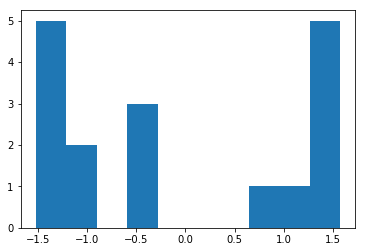

[-1.51814394 -1.32508517 -1.11447561 -1.00917082 -0.5879517  -0.46509612
 -0.41244373  0.93896764  1.25488198  1.36018676  1.41283915  1.53569473
  1.55324553  1.57079633] [1 4 1 1 1 1 1 1 1 1 1 1 1 1]
top in degrees: 14.0782122905
angle_rotation:  14.0782122905
[-1.32508517 -1.32508517 -1.11447561 -1.00917082 -1.32508517 -1.32508517
  1.53569473  1.55324553 -0.5879517   1.25488198  1.36018676 -1.51814394
  1.57079633  1.41283915 -0.46509612 -0.41244373  0.93896764]


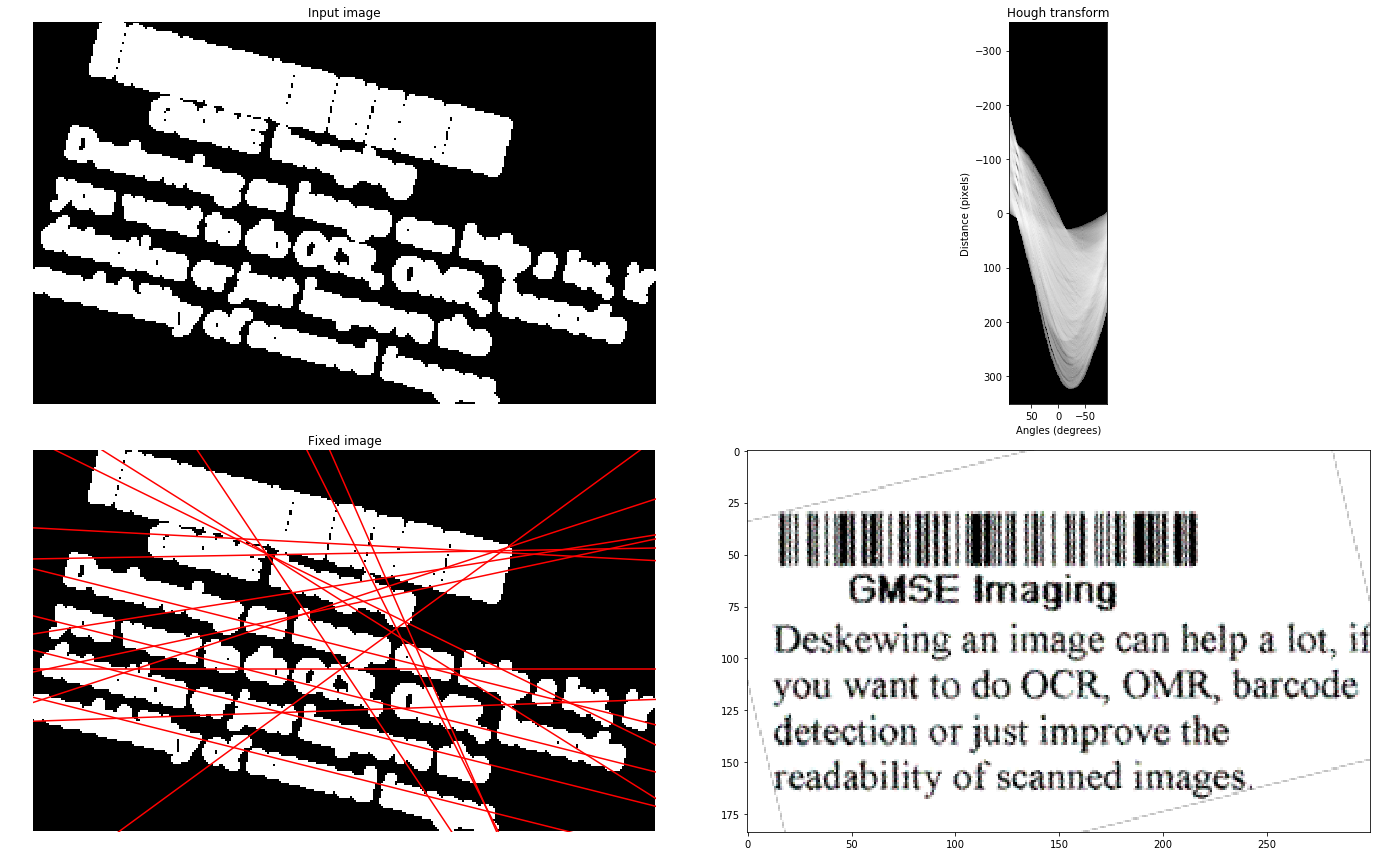

file: sample2.png
line peaks
hspace [618 600 592 591 591 591 584 579 579 578 577 577 574 574 573 573 572 571
 571 568 566 565 565 565 561 560 560 559 559 557 556 556 555 554 552 552
 550 549 548 548 547 547 546 546 545 545 544 544 544 544 543 543 543 543
 542 542 541 540 540 538 535 531 531 531 530 529 527 526 524 523 523 522
 522 522 522 520 520 520 520 519 519 518 518 518 517 517 517 516 516 515
 514 514 514 513 513 512 511 511 511 511 510 510 509 507 506 506 503 500
 500 500 500 499 499 498 498 497 496 494 494 493 493 492 492 491 490 490
 489 487 487 486 485 482 480 480 478 474 471 471 471 470 469 466 465 456
 454 452 452 449 446 443 442 441 428 427 424 423 418 399 399 395 373 373
 372 372 372 371 368 365 362 361 351 350 346 320]
angles [-0.5879517   0.5879517  -0.11408018  1.46549155  0.5879517  -0.5879517
  1.46549155  1.46549155  0.5879517   1.46549155  1.46549155 -0.5879517
  0.5879517   0.41244373  1.46549155  1.46549155 -0.67570568 -0.5879517
 -0.5879517   1.46549155  1.465491

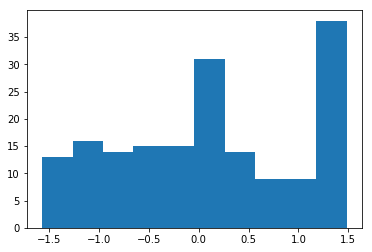

[-1.57079633 -1.55324553 -1.48304234 -1.46549155 -1.41283915 -1.39528836
 -1.37773756 -1.32508517 -1.28998358 -1.27243278 -1.23733118 -1.20222959
 -1.18467879 -1.1495772  -1.11447561 -1.09692481 -1.06182322 -1.04427242
 -1.02672162 -0.99162003 -0.97406923 -0.93896764 -0.92141684 -0.90386604
 -0.88631525 -0.86876445 -0.85121365 -0.83366286 -0.81611206 -0.78101046
 -0.74590887 -0.67570568 -0.5879517  -0.53529931 -0.51774851 -0.50019771
 -0.46509612 -0.44754532 -0.41244373 -0.39489293 -0.37734213 -0.28958815
 -0.25448656 -0.23693576 -0.16673257 -0.14918177 -0.13163098 -0.11408018
 -0.09652938 -0.07897859 -0.04387699 -0.0263262  -0.0087754   0.0087754
  0.0263262   0.04387699  0.06142779  0.07897859  0.09652938  0.11408018
  0.13163098  0.14918177  0.18428337  0.20183416  0.23693576  0.27203735
  0.28958815  0.32468974  0.34224054  0.35979134  0.37734213  0.41244373
  0.48264692  0.51774851  0.5879517   0.79856126  0.81611206  0.90386604
  0.92141684  0.97406923  0.99162003  1.02672162  1.

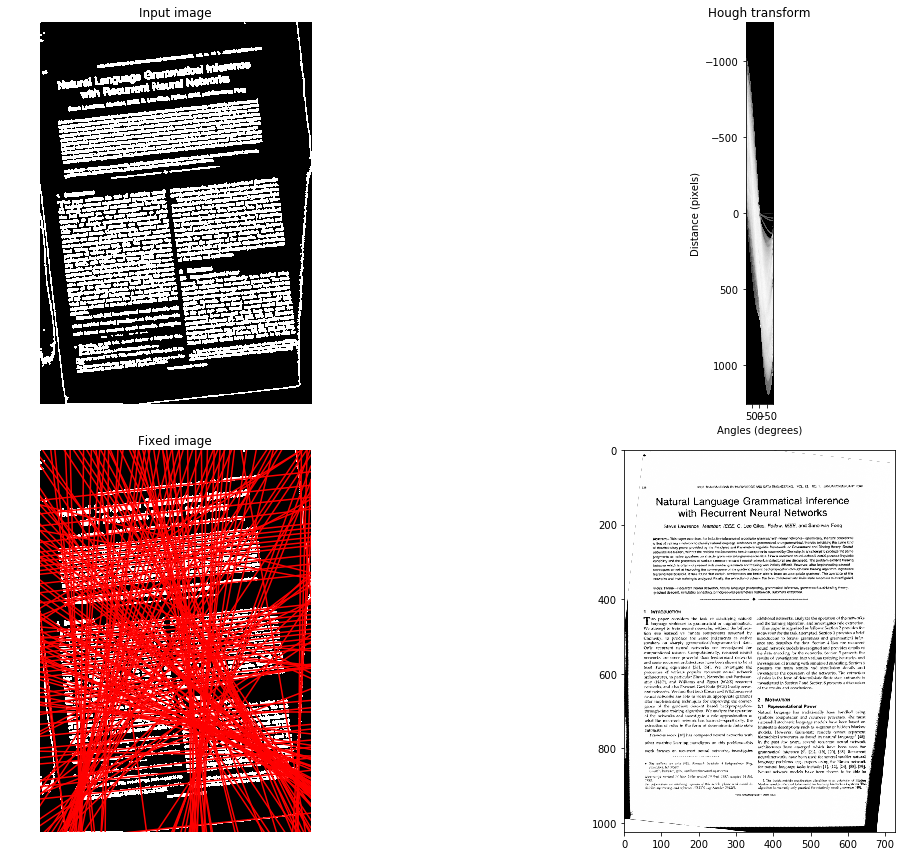

In [224]:
def objective_function_hough2(img):
    h, theta, d = hough_line(img)
    hspace, angles, dists = hough_line_peaks(h, theta, d)
    print(min(angles), max(angles))
    most_common_theta = np.rad2deg(mode(angles)[0][0]) # theta in degrees
    
    if most_common_theta > 0:
        text_angle = -90 + most_common_theta
    else:
        text_angle = 90 + most_common_theta
    
    print("top in degrees:", text_angle)
    return text_angle # convert from radians to degrees


def objective_function_hough(img):
    h, theta, d = hough_line(img)
    hspace, angles, dists = hough_line_peaks(h, theta, d)
    
    print("line peaks")
    print("hspace", hspace)
    print("angles", angles)
    
    plt.hist(angles)
    plt.show()
    
    unique, counts = np.unique(angles, return_counts=True)
    print(unique, counts)
    
    most_common_theta = np.rad2deg(mode(angles)[0][0]) # theta in degrees
    
    if most_common_theta > 0:
        text_angle = -90 + most_common_theta
    else:
        text_angle = 90 + most_common_theta
    
    print("top in degrees:", text_angle)
    return text_angle # convert from radians to degrees


def find_rotation_angle_hough(input_image_file):
    image = io.imread(input_image_file)
    image = rgb2gray(image)
        
    # binarize image
    thresh = threshold_otsu(image)
    image = image > thresh #binarize
    
    # apply sobel filter
    image = sobel(image)
    image = -image
    image = binary_dilation(image)
    print("file:", input_image_file)
    
    
    #TODO: I think there is an error here. we should be considering only the 2nd column in costs for argmax.
    angle_rotation = objective_function_hough(image)
    print("angle_rotation: ", angle_rotation)
    
    h, theta, d = hough_line(image)
    # Generating figure 1
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                 cmap=cm.gray)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    hspace, angles, dists = hough_line_peaks(h, theta, d)
    print(angles)
    
    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')
    
    fixed_image = rotate(io.imread(input_image_file), angle_rotation)
    ax[3].imshow(fixed_image, cmap=cm.gray)
    ax[2].set_axis_off()
    ax[2].set_title('Fixed image')   
    
    plt.tight_layout()
    plt.show()
    


def main():
    files = [
        'neg_28.png',
        'neg_4.png',
        'pos_24.png',
        'pos_41.png',
        'sample1.png',
        'sample2.png',
    ]
    
    for f in files:
        find_rotation_angle_hough(f)
#     find_rotation_angle_hough('neg_4.png')
    
main()

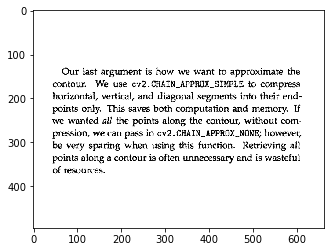

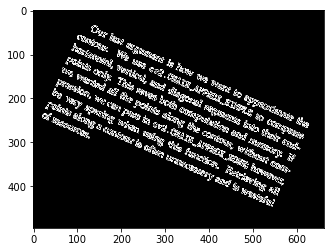

array([ 0.        ,  0.25      ,  0.35355339,  0.5       ,  0.55901699,
        0.70710678,  0.75      ,  0.79056942])

In [91]:
input_image_file = 'pos_24.png'
img = io.imread(input_image_file)
img = rgb2gray(img)
thresh = threshold_otsu(img)
img = img > thresh #binarize
plt.imshow(rotate(img, 24, cval=1), cmap='gray')
plt.show()

plt.imshow(sobel(img), cmap='gray')
plt.show()
np.unique(sobel(img))

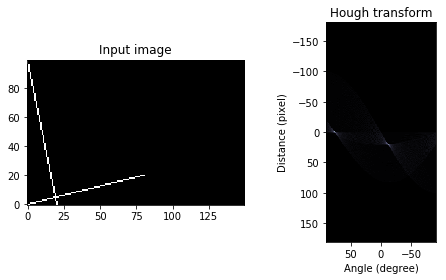

[-1.32508517  0.20183416]
[81 73]
text angle: [-75.92178771  11.56424581]


In [210]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import hough_line
from skimage.draw import line

# Constructing test image
img = np.zeros((100, 150), dtype=bool)

rr, cc = line(99, 0, 0,20)
img[rr, cc] = 1
rr, cc = line(0, 0, 20,80)
img[rr, cc] = 1

out, angles, d = hough_line(img)

fix, axes = plt.subplots(1, 2, figsize=(7, 4))

axes[0].imshow(img, cmap=plt.cm.gray, origin='lower')
axes[0].set_title('Input image')

axes[1].imshow(
    out, cmap=plt.cm.bone,
    extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]))
axes[1].set_title('Hough transform')
axes[1].set_xlabel('Angle (degree)')
axes[1].set_ylabel('Distance (pixel)')

plt.tight_layout()
plt.show()

hspace, angles, dists = hough_line_peaks(out, angles, d)
print((angles))
print(hspace)
print("text angle:", np.rad2deg(angles))